In [1]:
from load_df import load_df
dfy = load_df("data/y_train.csv")

In [2]:
obs_by_cat = {}
for cat in dfy["eqt_code_cat"].unique():
    obs_by_cat[cat] = dfy[dfy["eqt_code_cat"]==cat]["obs_id"].unique()

In [3]:
print(obs_by_cat[0])

[     2      4     27 ... 160691 160745 160786]


## Stock 0

In [4]:
dfx = load_df("data/x_train.csv")

In [5]:
dfx

,obs_id,venue,order_id,action,side,price,bid,ask,bid_size,ask_size,trade,flux
0,0,4,0,A,A,0.30,0.00,0.01,100,1,False,100
1,0,4,1,A,B,-0.17,0.00,0.01,100,1,False,100
2,0,4,2,D,A,0.28,0.00,0.01,100,1,False,-100
3,0,4,3,A,A,0.30,0.00,0.01,100,1,False,100
4,0,4,4,D,A,0.37,0.00,0.01,100,1,False,-100
...,...,...,...,...,...,...,...,...,...,...,...,...
16079995,160799,4,61,D,A,1.32,0.01,0.06,735,261,False,-100
16079996,160799,0,70,A,A,0.06,0.01,0.06,735,361,False,100
16079997,160799,4,71,A,A,1.26,0.01,0.06,735,361,False,100
16079998,160799,4,72,A,A,1.26,0.01,0.06,735,361,False,100


In [6]:
sample_obs = obs_by_cat[1][:20]

<Axes: >

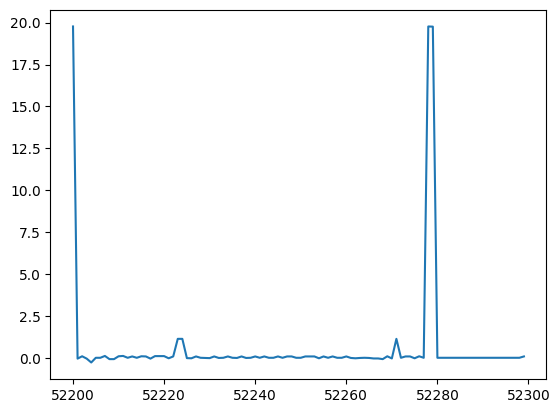

In [7]:
dfx[dfx["obs_id"]==sample_obs[17]]["price"].plot()

Observation: on a divers profils de bid que l'on peut essayer de catégoriser -> ensuite on a des statistiques sur les types de profils observés par stock. Un certain profil observé permet de trouver le stock le plus probable en utilisant Bayes.

Notamment un profil complètement à zéro. Il faudrait observer à la main les divers comportements possibles des stocks pour établir un profilage statistique par variable. Ensuite sur l'ensemble de test on calcule les mêmes profils et on calcule la probabilité de chaque stock étant donné 

## Statistics venues

In [8]:
sub_df = dfx[dfx['obs_id'].isin(obs_by_cat[2])]
sub_df["order_id"].value_counts()

order_id
0     12918
1     11234
6     11023
22    10941
15    10928
      ...  
93        4
94        3
95        2
96        1
97        1
Name: count, Length: 98, dtype: int64

In [9]:
stocks_by_venue_ranking = {450312:[0,9,22],
                           452103:[1,2,3,5,6,7,15],
                           450321:[4,17,19],
                           541023:[8],
                           452310:[10],
                           452013:[11,20],
                           450213:[12,21],
                           451203:[13,23],
                           452301:[14],
                           540312:[16],
                           453021:[18]
                           }

In [10]:
ranking = dfx[dfx["obs_id"]==0]["venue"].value_counts().index.to_list()
str_ranking = [str(rank) for rank in ranking]
print(''.join(str_ranking))

412503


## Order_id statistics

In [11]:
dfx[dfx["obs_id"]==1540]["order_id"].value_counts().value_counts().head(2).values

array([23, 20])

Idée pour les obs_id: le nombre de fois où on a deux fois le même obs_id dans une
même série temporelle et nombre de fois où obs_id est unique -> ratio entre les deux + ranking 
-> statistiques sur le ranking et moyenne du ratio par ranking. 